# Trip Advisor Hotel Reviews

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('tipadvisor.csv')

In [3]:
# five elements from the top
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
data.shape

(20491, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
data['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

C:\Users\ankit\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


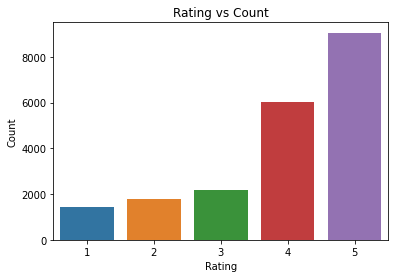

In [7]:
sns.countplot(data['Rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating vs Count')
plt.show()

**We can see that there are very less number of ratings for 1, 2 and 3. This means that hotels are more likely to be good.**

## Text Preprocessing

In [8]:
import re,string
# removing the html tags
def clean_html(text):
    clean=re.compile('<.*?>')
    cleantext=re.sub(clean,'',text)
    return cleantext
    
# first round of cleaning
def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

# second round of cleaning
def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text
    
cleaned_html=lambda x:clean_html(x)
cleaned1=lambda x:clean_text1(x)
cleaned2=lambda x:clean_text2(x)

data['Review']=pd.DataFrame(data.Review.apply(cleaned_html))
data['Review']=pd.DataFrame(data.Review.apply(cleaned1))
data['Review']=pd.DataFrame(data.Review.apply(cleaned2))

## Building the model

In [9]:
# importing the libraries
from keras.models import Sequential
from keras.layers import LSTM, Dense,Embedding
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [32]:
max_features=1500
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['Review'].values)
X = tokenizer.texts_to_sequences(data['Review'].values)
X = pad_sequences(X,maxlen=150)
Y=pd.get_dummies(data['Rating']).values

In [33]:
print(X.shape,Y.shape)

(20491, 150) (20491, 5)


## Defining the model

In [34]:
vec_len=64
model=Sequential()
model.add(Embedding(max_features,vec_len,input_length=150))
model.add(LSTM(128))
model.add(Dense(5,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 150, 64)           96000     
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 645       
Total params: 195,461
Trainable params: 195,461
Non-trainable params: 0
_________________________________________________________________
None


## Splitting the data

In [35]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.3,random_state=42)

In [36]:
model.fit(X_train,Y_train,epochs=10,batch_size=64,verbose=2,validation_data=(X_test,Y_test))

Epoch 1/10
225/225 - 4s - loss: 1.1342 - accuracy: 0.4983 - val_loss: 1.0136 - val_accuracy: 0.5556
Epoch 2/10
225/225 - 4s - loss: 0.9278 - accuracy: 0.5828 - val_loss: 0.9241 - val_accuracy: 0.5893
Epoch 3/10
225/225 - 3s - loss: 0.8353 - accuracy: 0.6313 - val_loss: 0.9265 - val_accuracy: 0.6004
Epoch 4/10
225/225 - 4s - loss: 0.8072 - accuracy: 0.6474 - val_loss: 0.9573 - val_accuracy: 0.5823
Epoch 5/10
225/225 - 4s - loss: 0.7719 - accuracy: 0.6621 - val_loss: 0.8959 - val_accuracy: 0.6075
Epoch 6/10
225/225 - 3s - loss: 0.7401 - accuracy: 0.6775 - val_loss: 0.9306 - val_accuracy: 0.5947
Epoch 7/10
225/225 - 3s - loss: 0.7162 - accuracy: 0.6893 - val_loss: 0.9388 - val_accuracy: 0.5973
Epoch 8/10
225/225 - 4s - loss: 0.6889 - accuracy: 0.7033 - val_loss: 1.0013 - val_accuracy: 0.5873
Epoch 9/10
225/225 - 3s - loss: 0.6586 - accuracy: 0.7164 - val_loss: 1.0116 - val_accuracy: 0.5838
Epoch 10/10
225/225 - 4s - loss: 0.6315 - accuracy: 0.7357 - val_loss: 1.0406 - val_accuracy: 0.5843